In [229]:
# Kernel alignment check
import sys
print('python executable:', sys.executable)
try:
    import folium
    print('folium', folium.__version__)
except Exception as e:
    print('folium import error:', e)

python executable: c:\Users\User\Documents\V-lib_Proj\.venv\Scripts\python.exe
folium 0.20.0


In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [231]:
df = pd.read_csv("comptage-velo-donnees-compteurs (2).csv", sep=";")

In [232]:
delete_columns = ['Lien vers photo du site de comptage', 'ID Photos', 'test_lien_vers_photos_du_site_de_comptage_', 'id_photo_1', 'url_sites', 'type_dimage']
df = df.drop(delete_columns, axis = 1)

In [233]:
# Sample function to transform column names
def transform_column_name(name):
    return name.replace(' ', '_').lower()

# Apply to all columns of the DataFrame
df.columns = [transform_column_name(col) for col in df.columns]

In [234]:
display(df.head())

,identifiant_du_compteur,nom_du_compteur,identifiant_du_site_de_comptage,nom_du_site_de_comptage,comptage_horaire,date_et_heure_de_comptage,date_d'installation_du_site_de_comptage,coordonnées_géographiques,identifiant_technique_compteur,mois_annee_comptage
0,100003098-101003098,106 avenue Denfert Rochereau NE-SO,100003098.0,106 avenue Denfert Rochereau,0,2024-08-01T05:00:00+02:00,2012-02-22,"48.83507,2.33305",Y2H20114504,2024-08
1,100003098-101003098,106 avenue Denfert Rochereau NE-SO,100003098.0,106 avenue Denfert Rochereau,0,2024-08-01T08:00:00+02:00,2012-02-22,"48.83507,2.33305",Y2H20114504,2024-08
2,100003098-101003098,106 avenue Denfert Rochereau NE-SO,100003098.0,106 avenue Denfert Rochereau,0,2024-08-01T10:00:00+02:00,2012-02-22,"48.83507,2.33305",Y2H20114504,2024-08
3,100003098-101003098,106 avenue Denfert Rochereau NE-SO,100003098.0,106 avenue Denfert Rochereau,0,2024-08-01T06:00:00+02:00,2012-02-22,"48.83507,2.33305",Y2H20114504,2024-08
4,100003098-101003098,106 avenue Denfert Rochereau NE-SO,100003098.0,106 avenue Denfert Rochereau,0,2024-08-01T14:00:00+02:00,2012-02-22,"48.83507,2.33305",Y2H20114504,2024-08


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899336 entries, 0 to 899335
Data columns (total 10 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   identifiant_du_compteur                  872571 non-null  object 
 1   nom_du_compteur                          899336 non-null  object 
 2   identifiant_du_site_de_comptage          872571 non-null  float64
 3   nom_du_site_de_comptage                  872571 non-null  object 
 4   comptage_horaire                         899336 non-null  int64  
 5   date_et_heure_de_comptage                899336 non-null  object 
 6   date_d'installation_du_site_de_comptage  872571 non-null  object 
 7   coordonnées_géographiques                872571 non-null  object 
 8   identifiant_technique_compteur           863338 non-null  object 
 9   mois_annee_comptage                      899336 non-null  object 
dtypes: float64(1), int64(1), object(

In [236]:
#enlever les NA
df = df.dropna()

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 863338 entries, 0 to 899335
Data columns (total 10 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   identifiant_du_compteur                  863338 non-null  object 
 1   nom_du_compteur                          863338 non-null  object 
 2   identifiant_du_site_de_comptage          863338 non-null  float64
 3   nom_du_site_de_comptage                  863338 non-null  object 
 4   comptage_horaire                         863338 non-null  int64  
 5   date_et_heure_de_comptage                863338 non-null  object 
 6   date_d'installation_du_site_de_comptage  863338 non-null  object 
 7   coordonnées_géographiques                863338 non-null  object 
 8   identifiant_technique_compteur           863338 non-null  object 
 9   mois_annee_comptage                      863338 non-null  object 
dtypes: float64(1), int64(1), object(8)
me

In [238]:
# Parse the datetime column correctly
df['date_et_heure_de_comptage'] = pd.to_datetime(df['date_et_heure_de_comptage'], utc=True)

# Remove the timezone (make tz-naive to avoid time zone issues (mismatches))
df['date_et_heure_de_comptage'] = df['date_et_heure_de_comptage'].dt.tz_convert(None)

In [239]:
# Function to determine the season from a date
def get_season_from_date(date):
    year = date.year
    spring = pd.Timestamp(f'{year}-03-20')
    summer = pd.Timestamp(f'{year}-06-21')
    autumn = pd.Timestamp(f'{year}-09-22')
    winter = pd.Timestamp(f'{year}-12-21')

    if spring <= date < summer:
        return 'spring'
    elif summer <= date < autumn:
        return 'summer'
    elif autumn <= date < winter:
        return 'autumn'
    else:
        return 'winter'

# Apply to DataFrame
df['saison'] = df['date_et_heure_de_comptage'].apply(get_season_from_date)

In [240]:
# Define the list of holiday intervals (inclusive start, exclusive end)
vacances_periods = [
    ('2024-10-19', '2024-11-05'),  # Toussaint
    ('2024-12-21', '2025-01-07'),  # Noël
    ('2025-02-15', '2025-03-04'),  # Hiver
    ('2025-04-12', '2025-04-29'),  # Printemps
    ('2025-05-29', '2025-06-01'),  # Ascension + pont (29, 30, 31)
    ('2025-07-05', '2025-09-02'),  # Summer begins 5 July to 1 Sept
]

# Convert to datetime timestamps
vacances_intervals = [
    (pd.Timestamp(start), pd.Timestamp(end))
    for start, end in vacances_periods
]

# Define function to test if date falls in a holiday
def is_vacances(date):
    for start, end in vacances_intervals:
        if start <= date < end:
            return True
    return False

# Apply to DataFrame
df['vacances'] = df['date_et_heure_de_comptage'].apply(is_vacances)

In [241]:
# Function to classify rush hour
def is_rush_hour(dt):
    hour = dt.hour
    return (7 <= hour < 10) or (17 <= hour < 20)

# Apply to create the new column
df['heure_de_pointe'] = df['date_et_heure_de_comptage'].apply(is_rush_hour)

In [242]:
# Find the anchor date (the earliest datetime)
anchor_date = df['date_et_heure_de_comptage'].min().normalize()  # Drop time part

print(anchor_date) # This was a Saturday based on a Google search

df['jour'] = df['date_et_heure_de_comptage'].apply(
    lambda x: ((x.normalize() - anchor_date).days + 5) % 7
)

2024-08-01 00:00:00


In [243]:
# Créer un dictionnaire pour mapper les chiffres aux jours de la semaine
jours_de_la_semaine = {
    0: 'Samedi',
    1: 'Dimanche',
    2: 'Lundi',
    3: 'Mardi',
    4: 'Mercredi',
    5: 'Jeudi',
    6: 'Vendredi'
}

df['nom_jour'] = df['jour'].map(jours_de_la_semaine)

In [244]:
df["heure"] = df["date_et_heure_de_comptage"].dt.hour

In [245]:
# Example rough night hours per season (24h format)
night_hours = {
    'winter':    {'start': 17, 'end': 8},
    'spring':{'start': 20.5, 'end': 6},   # 20:30
    'summer':      {'start': 22, 'end': 5},
    'autumn':  {'start': 19, 'end': 7},
}

def is_night(row):
    season = row['saison'].lower()
    dt = row['date_et_heure_de_comptage']
    hour = dt.hour + dt.minute/60  # fractional hour
    
    nh = night_hours.get(season)
    if nh is None:
        # if season is unknown, consider not night
        return False
    
    start, end = nh['start'], nh['end']
    
    # Since all seasons cross midnight, we only need this check
    return hour >= start or hour < end

# Apply to DataFrame
df['nuit'] = df.apply(is_night, axis=1)

In [246]:
# Séparer la colonne "coordonnees_geographiques" en deux colonnes latitude et longitude
df[["latitude", "longitude"]] = df["coordonnées_géographiques"].str.split(",", expand=True)

df["latitude"] = df["latitude"].astype(float)
df["longitude"] = df["longitude"].astype(float)

In [247]:
#vérification
df.head()

,identifiant_du_compteur,nom_du_compteur,identifiant_du_site_de_comptage,nom_du_site_de_comptage,comptage_horaire,date_et_heure_de_comptage,date_d'installation_du_site_de_comptage,coordonnées_géographiques,identifiant_technique_compteur,mois_annee_comptage,saison,vacances,heure_de_pointe,jour,nom_jour,heure,nuit,latitude,longitude
0,100003098-101003098,106 avenue Denfert Rochereau NE-SO,100003098.0,106 avenue Denfert Rochereau,0,2024-08-01 03:00:00,2012-02-22,"48.83507,2.33305",Y2H20114504,2024-08,summer,False,False,5,Jeudi,3,True,48.83507,2.33305
1,100003098-101003098,106 avenue Denfert Rochereau NE-SO,100003098.0,106 avenue Denfert Rochereau,0,2024-08-01 06:00:00,2012-02-22,"48.83507,2.33305",Y2H20114504,2024-08,summer,False,False,5,Jeudi,6,False,48.83507,2.33305
2,100003098-101003098,106 avenue Denfert Rochereau NE-SO,100003098.0,106 avenue Denfert Rochereau,0,2024-08-01 08:00:00,2012-02-22,"48.83507,2.33305",Y2H20114504,2024-08,summer,False,True,5,Jeudi,8,False,48.83507,2.33305
3,100003098-101003098,106 avenue Denfert Rochereau NE-SO,100003098.0,106 avenue Denfert Rochereau,0,2024-08-01 04:00:00,2012-02-22,"48.83507,2.33305",Y2H20114504,2024-08,summer,False,False,5,Jeudi,4,True,48.83507,2.33305
4,100003098-101003098,106 avenue Denfert Rochereau NE-SO,100003098.0,106 avenue Denfert Rochereau,0,2024-08-01 12:00:00,2012-02-22,"48.83507,2.33305",Y2H20114504,2024-08,summer,False,False,5,Jeudi,12,False,48.83507,2.33305


In [248]:
df = df.drop(columns=["coordonnées_géographiques"])

In [249]:
# Créer une version unique pour l'affichage, sans modifier le df original
df_unique = df.drop_duplicates(subset=["nom_du_site_de_comptage"])

In [250]:
import folium

m = folium.Map(location=(48.86, 2.33), zoom_start=13)

for _, row in df_unique.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=row["nom_du_site_de_comptage"],
        icon=folium.Icon(color="blue", icon="bicycle", prefix="fa")
    ).add_to(m)

m.save("compteur_paris.html")

In [251]:
import pandas as pd

def get_date_range(df, date_col):
    min_date = df[date_col].min()
    max_date = df[date_col].max()
    
    return min_date, max_date


In [252]:
min_date, max_date = get_date_range(df, "date_et_heure_de_comptage")

print("Date la plus ancienne :", min_date)
print("Date la plus récente  :", max_date)

Date la plus ancienne : 2024-08-01 03:00:00
Date la plus récente  : 2025-09-02 21:00:00


In [253]:
#API météo

import requests
import pandas as pd
# API endpoint
url = "https://archive-api.open-meteo.com/v1/archive?latitude=48.8575&longitude=2.3514&start_date=2024-08-01&end_date=2025-10-07&hourly=rain,snowfall,apparent_temperature,wind_speed_10m"
# Send GET request
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    # print(data)
    # records = data.get("temperature_2m", [])
    # temperature = data.get("temperature_2m", [])
    records = data["hourly"]
    # Convert list of dicts to DataFrame
    df_weather = pd.DataFrame(records)
    
    # Show first few rows
    print(df_weather)
else:
    print("Error:", response.status_code)

                   time  rain  snowfall  apparent_temperature  wind_speed_10m
0      2024-08-01T00:00   0.0       0.0                  25.6             4.6
1      2024-08-01T01:00   0.2       0.0                  25.5            11.7
2      2024-08-01T02:00   9.9       0.0                  23.3            13.7
3      2024-08-01T03:00   0.8       0.0                  24.2             6.6
4      2024-08-01T04:00   8.2       0.0                  23.0             6.4
...                 ...   ...       ...                   ...             ...
10387  2025-10-07T19:00   0.0       0.0                  15.1             2.7
10388  2025-10-07T20:00   0.0       0.0                  14.5             1.7
10389  2025-10-07T21:00   0.0       0.0                  14.0             1.8
10390  2025-10-07T22:00   0.0       0.0                  13.0             3.4
10391  2025-10-07T23:00   0.0       0.0                  12.6             2.1

[10392 rows x 5 columns]


In [254]:
df_weather['time'] = pd.to_datetime(df_weather['time'], utc=True)
df_weather['time'] = df_weather['time'].dt.tz_convert(None)
print(df_weather)


                     time  rain  snowfall  apparent_temperature  \
0     2024-08-01 00:00:00   0.0       0.0                  25.6   
1     2024-08-01 01:00:00   0.2       0.0                  25.5   
2     2024-08-01 02:00:00   9.9       0.0                  23.3   
3     2024-08-01 03:00:00   0.8       0.0                  24.2   
4     2024-08-01 04:00:00   8.2       0.0                  23.0   
...                   ...   ...       ...                   ...   
10387 2025-10-07 19:00:00   0.0       0.0                  15.1   
10388 2025-10-07 20:00:00   0.0       0.0                  14.5   
10389 2025-10-07 21:00:00   0.0       0.0                  14.0   
10390 2025-10-07 22:00:00   0.0       0.0                  13.0   
10391 2025-10-07 23:00:00   0.0       0.0                  12.6   

       wind_speed_10m  
0                 4.6  
1                11.7  
2                13.7  
3                 6.6  
4                 6.4  
...               ...  
10387             2.7  
103

In [255]:
df_merged = pd.merge(
    df,
    df_weather,
    how="left",
    left_on="date_et_heure_de_comptage",
    right_on="time"
).drop(columns=["time"])

In [256]:
df_merged.head()


,identifiant_du_compteur,nom_du_compteur,identifiant_du_site_de_comptage,nom_du_site_de_comptage,comptage_horaire,date_et_heure_de_comptage,date_d'installation_du_site_de_comptage,identifiant_technique_compteur,mois_annee_comptage,saison,...,jour,nom_jour,heure,nuit,latitude,longitude,rain,snowfall,apparent_temperature,wind_speed_10m
0,100003098-101003098,106 avenue Denfert Rochereau NE-SO,100003098.0,106 avenue Denfert Rochereau,0,2024-08-01 03:00:00,2012-02-22,Y2H20114504,2024-08,summer,...,5,Jeudi,3,True,48.83507,2.33305,0.8,0.0,24.2,6.6
1,100003098-101003098,106 avenue Denfert Rochereau NE-SO,100003098.0,106 avenue Denfert Rochereau,0,2024-08-01 06:00:00,2012-02-22,Y2H20114504,2024-08,summer,...,5,Jeudi,6,False,48.83507,2.33305,0.0,0.0,22.9,10.4
2,100003098-101003098,106 avenue Denfert Rochereau NE-SO,100003098.0,106 avenue Denfert Rochereau,0,2024-08-01 08:00:00,2012-02-22,Y2H20114504,2024-08,summer,...,5,Jeudi,8,False,48.83507,2.33305,0.0,0.0,26.8,8.0
3,100003098-101003098,106 avenue Denfert Rochereau NE-SO,100003098.0,106 avenue Denfert Rochereau,0,2024-08-01 04:00:00,2012-02-22,Y2H20114504,2024-08,summer,...,5,Jeudi,4,True,48.83507,2.33305,8.2,0.0,23.0,6.4
4,100003098-101003098,106 avenue Denfert Rochereau NE-SO,100003098.0,106 avenue Denfert Rochereau,0,2024-08-01 12:00:00,2012-02-22,Y2H20114504,2024-08,summer,...,5,Jeudi,12,False,48.83507,2.33305,0.0,0.0,31.7,12.6


In [257]:
df_merged.shape
df_merged.info()
df_merged.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863338 entries, 0 to 863337
Data columns (total 22 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   identifiant_du_compteur                  863338 non-null  object        
 1   nom_du_compteur                          863338 non-null  object        
 2   identifiant_du_site_de_comptage          863338 non-null  float64       
 3   nom_du_site_de_comptage                  863338 non-null  object        
 4   comptage_horaire                         863338 non-null  int64         
 5   date_et_heure_de_comptage                863338 non-null  datetime64[ns]
 6   date_d'installation_du_site_de_comptage  863338 non-null  object        
 7   identifiant_technique_compteur           863338 non-null  object        
 8   mois_annee_comptage                      863338 non-null  object        
 9   saison                    

identifiant_du_compteur                            object
nom_du_compteur                                    object
identifiant_du_site_de_comptage                   float64
nom_du_site_de_comptage                            object
comptage_horaire                                    int64
date_et_heure_de_comptage                  datetime64[ns]
date_d'installation_du_site_de_comptage            object
identifiant_technique_compteur                     object
mois_annee_comptage                                object
saison                                             object
vacances                                             bool
heure_de_pointe                                      bool
jour                                                int64
nom_jour                                           object
heure                                               int32
nuit                                                 bool
latitude                                          float64
longitude     

In [258]:
#etude sur la pluie 
from scipy.stats import pearsonr

corr, p_value = pearsonr(df_merged['comptage_horaire'], df_merged['rain'])
print(corr, p_value)

-0.02573073673037014 2.3037659823196285e-126


In [259]:
df_merged['pluie'] = (df_merged['rain'] > 0)
df_merged.groupby('pluie')['comptage_horaire'].mean()

#la pluie n'influence pas forcément l'affluence en vélo

pluie
False    80.491664
True     69.419103
Name: comptage_horaire, dtype: float64

In [260]:
corr, p_value = pearsonr(df_merged['comptage_horaire'], df_merged['snowfall'])
print(corr, p_value)

-0.002995742942831842 0.005377151358839699


In [261]:
df_merged['neige'] = (df_merged['snowfall'] > 0)
df_merged.groupby('neige')['comptage_horaire'].mean()

#la neige influe un minimum mais pas forcément significatif 

neige
False    78.881715
True     53.884663
Name: comptage_horaire, dtype: float64

In [262]:
corr, p_value = pearsonr(df_merged['comptage_horaire'], df_merged['apparent_temperature'])
print(corr, p_value)

0.10019045553465566 0.0


In [263]:
df_merged['temperature'] = (df_merged['apparent_temperature'] < 10)
df_merged.groupby('temperature')['comptage_horaire'].mean()

#la tempertature influe sur l'affluence des vélos

temperature
False    91.821811
True     61.473651
Name: comptage_horaire, dtype: float64

In [264]:
corr, p_value = pearsonr(df_merged['comptage_horaire'], df_merged['wind_speed_10m'])
print(corr, p_value)

0.01811471972140364 1.40243962984032e-63


In [265]:
df_merged['vent'] = (df_merged['wind_speed_10m'] > 30)
df_merged.groupby('vent')['comptage_horaire'].mean()

#le vent n'influence pas forcément l'affluence en vélo

vent
False    78.830986
True     64.951122
Name: comptage_horaire, dtype: float64

In [266]:
from scipy.stats import ttest_ind

ttest_ind(df_merged[df_merged['nuit']==0]['comptage_horaire'],
          df_merged[df_merged['nuit']==1]['comptage_horaire'])

#Il existe une différence statistiquement significative entre l’affluence vélo le jour et la nuit.
#le trafic vélo est nettement plus élevé le jour qu’à la nuit.

TtestResult(statistic=np.float64(199.4838854991753), pvalue=np.float64(0.0), df=np.float64(863336.0))

In [267]:
from scipy.stats import f_oneway

f_oneway(df_merged[df_merged['saison']=='summer']['comptage_horaire'],
         df_merged[df_merged['saison']=='winter']['comptage_horaire'],
         df_merged[df_merged['saison']=='spring']['comptage_horaire'],
         df_merged[df_merged['saison']=='autumn']['comptage_horaire'])

#Il existe une différence statistiquement significative d’affluence vélo entre les saisons.
#trafic vélo varie donc selon la saison (probablement plus élevé en été, plus faible en hiver).

F_onewayResult(statistic=np.float64(1064.2653595197157), pvalue=np.float64(0.0))

In [268]:
ttest_ind(df_merged[df_merged['vacances']==True]['comptage_horaire'],
          df_merged[df_merged['vacances']==False]['comptage_horaire'])

#Il existe une différence hautement significative entre les périodes de vacances et non-vacances.
#trafic vélo est nettement plus faible pendant les vacances scolaires.

TtestResult(statistic=np.float64(-18.875232675754518), pvalue=np.float64(1.891822580908606e-79), df=np.float64(863336.0))

In [269]:
ttest_ind(df_merged[df_merged['heure_de_pointe']==True]['comptage_horaire'],
          df_merged[df_merged['heure_de_pointe']==False]['comptage_horaire'])

#Le trafic vélo est très significativement plus élevé pendant les heures de pointe.
#une des variables les plus explicatives du comptage horaire.

TtestResult(statistic=np.float64(122.03123919265317), pvalue=np.float64(0.0), df=np.float64(863336.0))

In [270]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_merged['nuit'], df_merged['vacances'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(chi2, p)

#variables dépendantes

2152.9724742505587 0.0


In [271]:
contingency_table = pd.crosstab(df_merged['nuit'], df_merged['heure_de_pointe'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(chi2, p)

#variables dépendantes

67777.90044285817 0.0


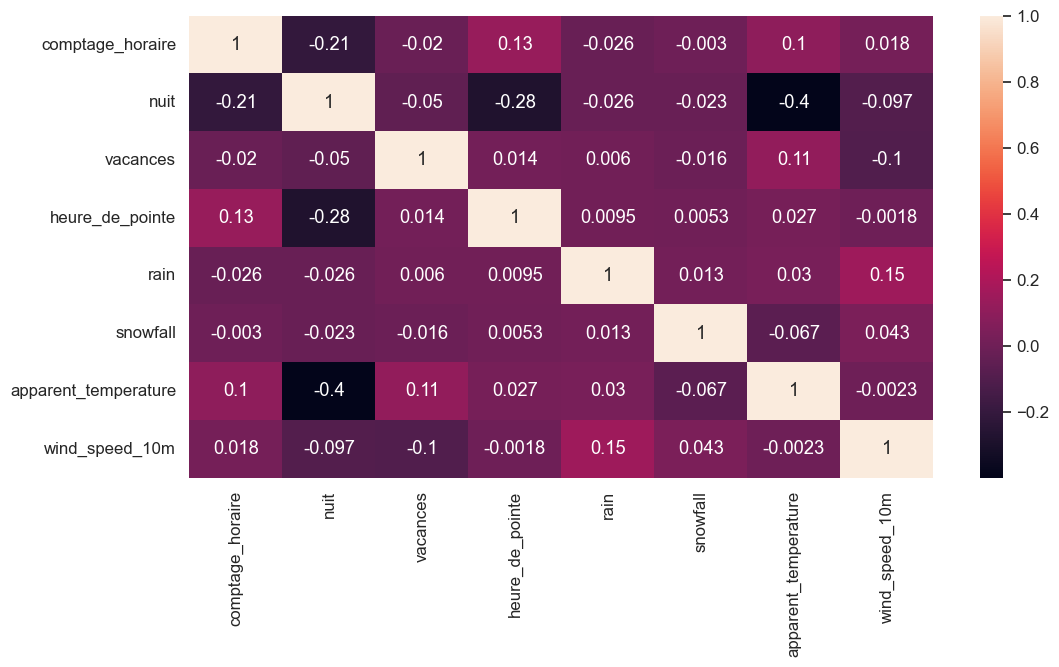

In [272]:
corr_matrix = df_merged[['comptage_horaire','nuit','vacances', 'heure_de_pointe', 'rain','snowfall','apparent_temperature','wind_speed_10m']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

#Le trafic vélo est plus faible la nuit (r = -0.21)
#L’affluence est plus forte en heures de pointe (r = 0.13)
#La température a un léger effet positif.
#Les effets météo (pluie, vent, neige) sont faibles en corrélation linéaire, mais peuvent avoir des effets non linéaires (seuils).

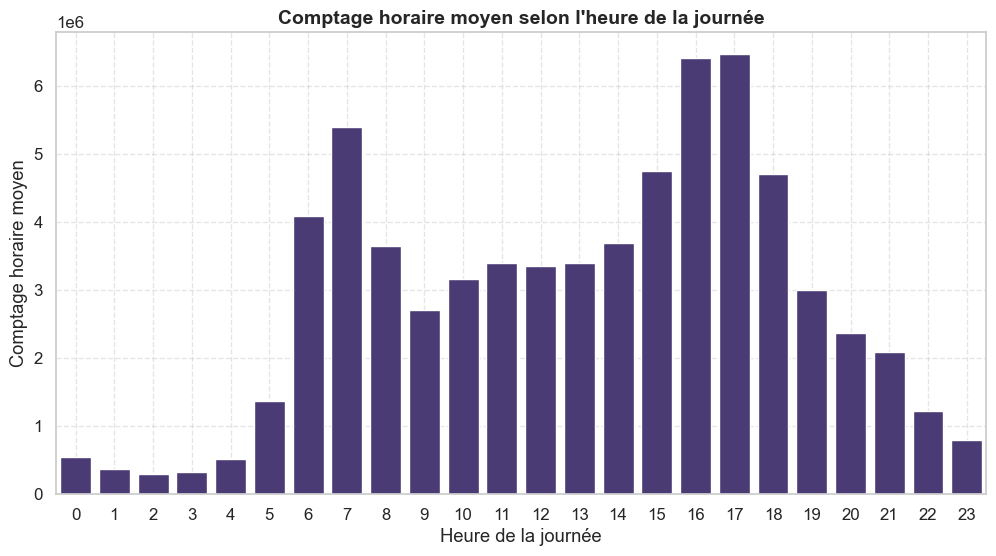

In [273]:
plt.figure(figsize=(12,6))

df_heure = df_merged.groupby('heure', as_index=False)['comptage_horaire'].sum()


sns.barplot(
    data=df_heure,
    x='heure',
    y='comptage_horaire',
    errorbar=None
)
plt.title("Comptage horaire moyen selon l'heure de la journée", fontsize=14, fontweight='bold')
plt.xlabel("Heure de la journée")
plt.ylabel("Comptage horaire moyen")
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

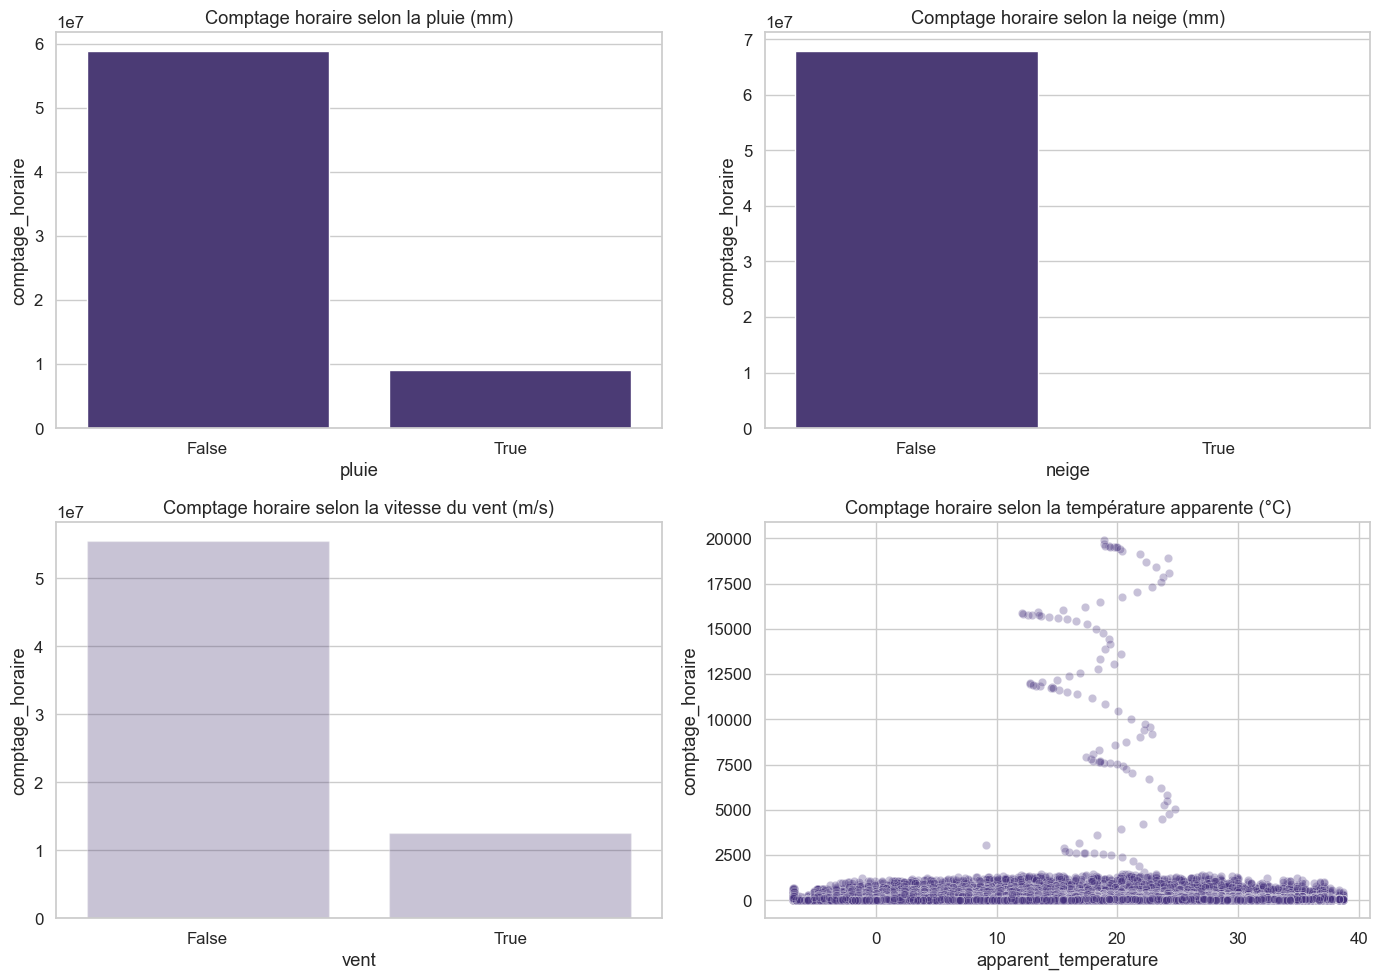

In [274]:
sns.set(style="whitegrid", palette="viridis", font_scale=1.1)
plt.rcParams['figure.figsize'] = (12, 6)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

df_merged['vent'] = (df_merged['wind_speed_10m'] > 15)
df_merged['neige'] = (df_merged['snowfall'] > 0)
df_merged['pluie'] = (df_merged['rain'] > 0)

df_pluie = df_merged.groupby('pluie', as_index=False)['comptage_horaire'].sum()
df_neige = df_merged.groupby('neige', as_index=False)['comptage_horaire'].sum()
df_vent = df_merged.groupby('vent', as_index=False)['comptage_horaire'].sum()

# 1. Pluie
sns.barplot(x='pluie', y='comptage_horaire', data=df_pluie, ax=axes[0])
axes[0].set_title("Comptage horaire selon la pluie (mm)")

# 2. Neige
sns.barplot(x='neige', y='comptage_horaire', data=df_neige, ax=axes[1])
axes[1].set_title("Comptage horaire selon la neige (mm)")

# 3. Vent
sns.barplot(x='vent', y='comptage_horaire', alpha=0.3, data=df_vent, ax=axes[2])
axes[2].set_title("Comptage horaire selon la vitesse du vent (m/s)")

# 4. Température
sns.scatterplot(x='apparent_temperature', y='comptage_horaire', alpha=0.3, data=df_merged, ax=axes[3])
axes[3].set_title("Comptage horaire selon la température apparente (°C)")

plt.tight_layout()
plt.show()


In [275]:
print(df_merged.columns)

Index(['identifiant_du_compteur', 'nom_du_compteur',
       'identifiant_du_site_de_comptage', 'nom_du_site_de_comptage',
       'comptage_horaire', 'date_et_heure_de_comptage',
       'date_d'installation_du_site_de_comptage',
       'identifiant_technique_compteur', 'mois_annee_comptage', 'saison',
       'vacances', 'heure_de_pointe', 'jour', 'nom_jour', 'heure', 'nuit',
       'latitude', 'longitude', 'rain', 'snowfall', 'apparent_temperature',
       'wind_speed_10m', 'pluie', 'neige', 'temperature', 'vent'],
      dtype='object')


In [276]:
df_merged["mois"] = df_merged["date_et_heure_de_comptage"].dt.month

C:\Users\User\AppData\Local\Temp\ipykernel_6808\1869373785.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(["Non vacances", "Vacances"])
C:\Users\User\AppData\Local\Temp\ipykernel_6808\1869373785.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[3].set_xticklabels(["Heures creuses", "Heures de pointe"])


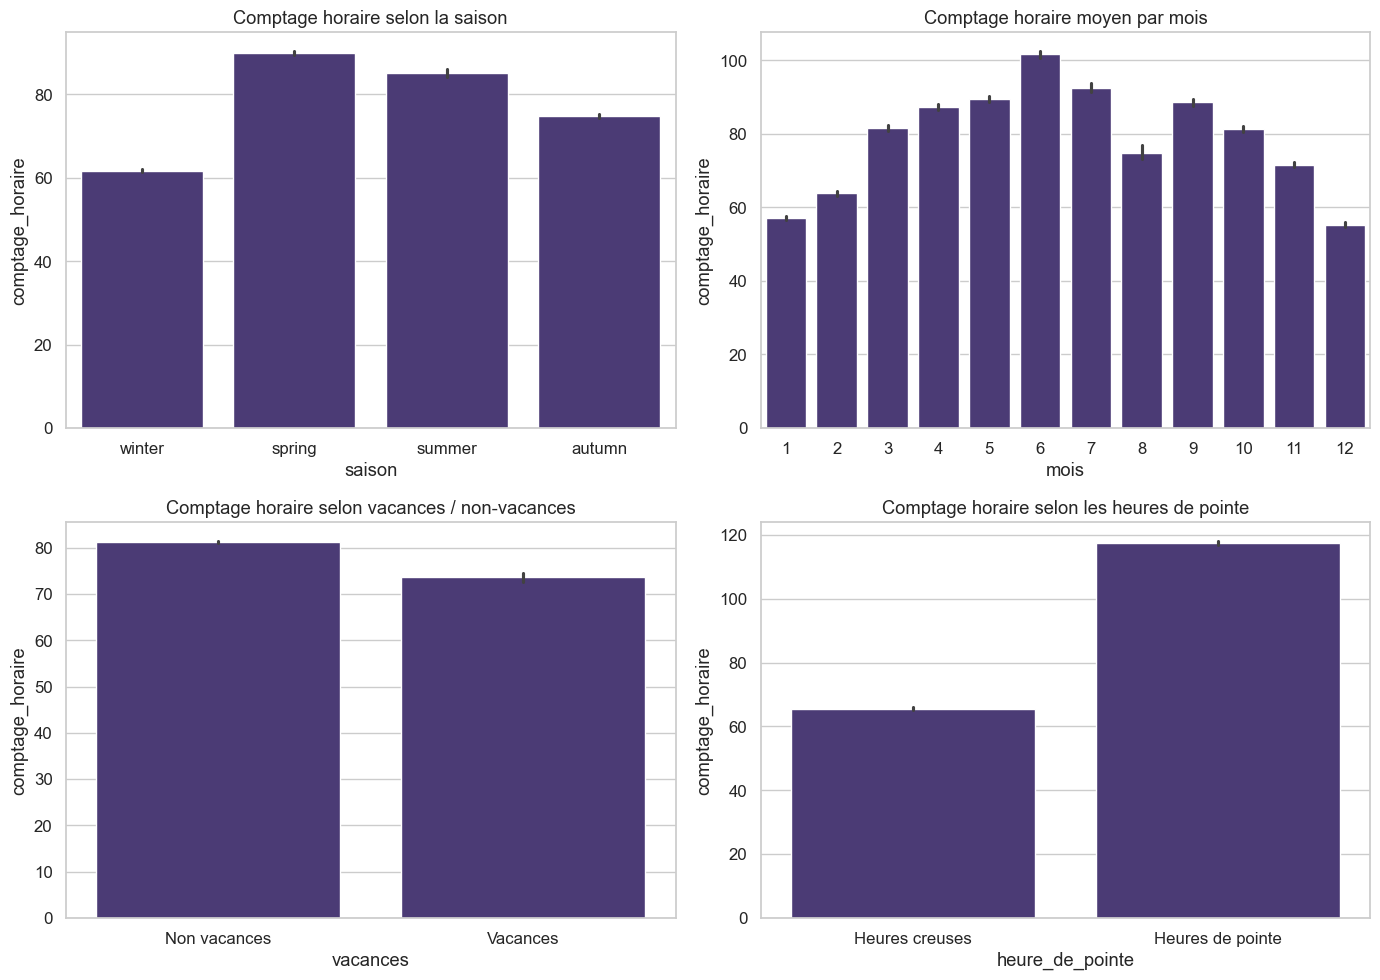

In [277]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# 1. Saisons
sns.barplot(x='saison', y='comptage_horaire', order=['winter', 'spring', 'summer', 'autumn'], data=df_merged, ax=axes[0])
axes[0].set_title("Comptage horaire selon la saison")

# 2. Mois
sns.barplot(x='mois', y='comptage_horaire', data=df_merged, ax=axes[1])
axes[1].set_title("Comptage horaire moyen par mois")

# 3. Vacances
sns.barplot(x='vacances', y='comptage_horaire', data=df_merged, ax=axes[2])
axes[2].set_title("Comptage horaire selon vacances / non-vacances")
axes[2].set_xticklabels(["Non vacances", "Vacances"])

# 4. Heures de pointe
sns.barplot(x='heure_de_pointe', y='comptage_horaire', data=df_merged, ax=axes[3])
axes[3].set_title("Comptage horaire selon les heures de pointe")
axes[3].set_xticklabels(["Heures creuses", "Heures de pointe"])

plt.tight_layout()
plt.show()

In [278]:
from folium.plugins import HeatMap

m = folium.Map(location=[48.8566, 2.3522], zoom_start=12, tiles='CartoDB positron')

df_heat = df_merged.groupby(['latitude', 'longitude'], as_index=False)['comptage_horaire'].sum()

# Ajout de la heatmap
HeatMap(
    data=df_heat[['latitude', 'longitude', 'comptage_horaire']].values,
    radius=30,
    max_zoom=13
).add_to(m)

m.save("heatmap_velos_paris.html")
m

In [279]:
print(df_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863338 entries, 0 to 863337
Data columns (total 27 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   identifiant_du_compteur                  863338 non-null  object        
 1   nom_du_compteur                          863338 non-null  object        
 2   identifiant_du_site_de_comptage          863338 non-null  float64       
 3   nom_du_site_de_comptage                  863338 non-null  object        
 4   comptage_horaire                         863338 non-null  int64         
 5   date_et_heure_de_comptage                863338 non-null  datetime64[ns]
 6   date_d'installation_du_site_de_comptage  863338 non-null  object        
 7   identifiant_technique_compteur           863338 non-null  object        
 8   mois_annee_comptage                      863338 non-null  object        
 9   saison                    

In [280]:
print(df_merged["date_et_heure_de_comptage"])

0        2024-08-01 03:00:00
1        2024-08-01 06:00:00
2        2024-08-01 08:00:00
3        2024-08-01 04:00:00
4        2024-08-01 12:00:00
                 ...        
863333   2025-09-02 12:00:00
863334   2025-09-02 13:00:00
863335   2025-09-02 19:00:00
863336   2025-09-02 20:00:00
863337   2025-09-02 21:00:00
Name: date_et_heure_de_comptage, Length: 863338, dtype: datetime64[ns]


In [281]:
print(df_merged["identifiant_du_compteur"].nunique())
print(df_merged["nom_du_compteur"].nunique())
print(df_merged["nom_du_site_de_comptage"].nunique())
print(df_merged["identifiant_du_site_de_comptage"].nunique()) # Does not exactly coincide with nom_du_site_de_comptage, why???


97
97
65
68


In [282]:
# No need to keep all rows, just average per site since predictions will be per site
df_merged = df_merged.groupby(["identifiant_du_site_de_comptage", "date_et_heure_de_comptage"], as_index=False)["comptage_horaire"].mean()

In [283]:
print(df_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614744 entries, 0 to 614743
Data columns (total 3 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   identifiant_du_site_de_comptage  614744 non-null  float64       
 1   date_et_heure_de_comptage        614744 non-null  datetime64[ns]
 2   comptage_horaire                 614744 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 14.1 MB
None


In [284]:
# Removing unnecessary columns for modeling
df_merged = df_merged.drop(columns=["temperature", "latitude", "longitude","date_d'installation_du_site_de_comptage", \
                                    "identifiant_technique_compteur", "mois_annee_comptage", "identifiant_du_compteur", \
                                        "nom_du_site_de_comptage", "jour", "nom_du_compteur", "date_et_heure_de_comptage"])

KeyError: '[\'temperature\', \'latitude\', \'longitude\', "date_d\'installation_du_site_de_comptage", \'identifiant_technique_compteur\', \'mois_annee_comptage\', \'identifiant_du_compteur\', \'nom_du_site_de_comptage\', \'jour\', \'nom_du_compteur\'] not found in axis'

In [ ]:
print(df_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863338 entries, 0 to 863337
Data columns (total 16 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   identifiant_du_site_de_comptage  863338 non-null  float64
 1   comptage_horaire                 863338 non-null  int64  
 2   saison                           863338 non-null  object 
 3   vacances                         863338 non-null  bool   
 4   heure_de_pointe                  863338 non-null  bool   
 5   nom_jour                         863338 non-null  object 
 6   heure                            863338 non-null  int32  
 7   nuit                             863338 non-null  bool   
 8   rain                             863338 non-null  float64
 9   snowfall                         863338 non-null  float64
 10  apparent_temperature             863338 non-null  float64
 11  wind_speed_10m                   863338 non-null  float64
 12  pl

# Encoding Categorical Variables
We'll encode:
- Categorical variables using `pd.get_dummies()`:
  - `saison` (winter, spring, summer, autumn)
  - `nom_jour` (days of week)
- Boolean variables to 0/1:
  - `nuit`, `vacances`, `heure_de_pointe`
  - `pluie`, `neige`, `vent`, `temperature`

In [ ]:
# Create a copy of df_merged to avoid modifying the original
df_encoded = df_merged.copy()

# 1. Encode boolean columns to 0/1 (they're already boolean but let's make them int)
boolean_cols = ['nuit', 'vacances', 'heure_de_pointe', 'pluie', 'neige', 'vent', 'temperature']
for col in boolean_cols:
    df_encoded[col] = df_encoded[col].astype(int)

# 2. Create dummy variables for categorical columns
# Saison (keep n-1 categories to avoid multicollinearity)
saison_dummies = pd.get_dummies(df_encoded['saison'], prefix='saison', drop_first=True)
df_encoded = pd.concat([df_encoded, saison_dummies], axis=1)

# Nom_jour (keep n-1 categories to avoid multicollinearity)
jour_dummies = pd.get_dummies(df_encoded['nom_jour'], prefix='jour', drop_first=True)
df_encoded = pd.concat([df_encoded, jour_dummies], axis=1)

# 3. Drop the original categorical columns
df_encoded = df_encoded.drop(['saison', 'nom_jour'], axis=1)

# Show the new encoded columns
print("\nNew encoded boolean columns (first few rows):")
print(df_encoded[boolean_cols].head())
print("\nNew encoded categorical columns (first few rows):")
print(df_encoded.filter(like='saison_').head())
print("\nNew encoded day columns (first few rows):")
print(df_encoded.filter(like='jour_').head())

KeyError: 'temperature'